In [93]:
import sys
sys.path.append("../Simulations/")

from units import *
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad, quad
from scipy.special import erf, jn, jv, kn
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
l_ary = np.linspace(1,1000,100)
an_ary = analytic(l_ary)

In [158]:
M200 = 1e7*M_s
Dl = 100*kpc

In [161]:
# def numerical(l):
#     return quadosc(lambda theta:  MPlumm(theta, M0, beta0)*j1(l*theta), [0, inf], period=2*pi/l)

def numerical(l):
    return quadosc(lambda theta:  MNFW(theta*Dl, M200)*j1(l*theta), [0, inf], period=2*pi/l)

In [163]:
num_ary = [numerical(l) for l in tqdm_notebook(l_ary)]

In [171]:
Dl = 10*kpc
v = 1e-3

In [175]:
Cl_ary = GN**2*v**2*8*pi*l*(l+1)/Dl**4*(1e69*np.array(num_ary))**2/(1e-6*asctorad/Year)**2

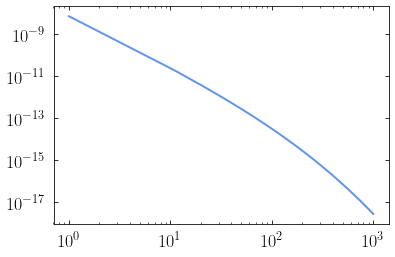

In [177]:
plt.plot(l_ary, Cl_ary)
plt.yscale("log")
plt.xscale("log")